RMSE stands for root-mean-square deviation
RMSE value for k=  1 is: 0.714247050954376
RMSE value for k=  2 is: 0.6147157940402133
RMSE value for k=  3 is: 0.5780009515433039
RMSE value for k=  4 is: 0.5497877558246168
RMSE value for k=  5 is: 0.5423848505594284
RMSE value for k=  6 is: 0.5331091657899212
RMSE value for k=  7 is: 0.5327370715325231
RMSE value for k=  8 is: 0.5278123974749754
RMSE value for k=  9 is: 0.5275294385229395
RMSE value for k=  10 is: 0.523687869933055
RMSE value for k=  11 is: 0.5204525377054767
RMSE value for k=  12 is: 0.5166470233581631
RMSE value for k=  13 is: 0.5137763895973215
RMSE value for k=  14 is: 0.5136627130561813
RMSE value for k=  15 is: 0.5127629820961622
RMSE value for k=  16 is: 0.5110262979523827
RMSE value for k=  17 is: 0.5094221124476368
RMSE value for k=  18 is: 0.5093718978961845
RMSE value for k=  19 is: 0.5080108619814452
RMSE value for k=  20 is: 0.5071945176705623


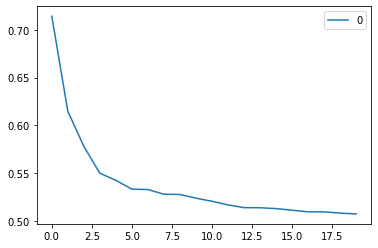

In [27]:
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('baseballData.csv')
df.head()


independent_cols = ['Delta (ERA)', 'Delta (RBI)', 'Delta (SLG)', 'Delta (AVG)']
X = df[independent_cols]
y = df.home_team_win



df.drop(['Delta (ERA)', 'Delta (RBI)'], axis=1, inplace=True)
df = pd.get_dummies(df)

from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)



from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

rmse_val = [] #to store rmse values for different k
print('RMSE stands for root-mean-square deviation')
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('RMSE value for k= ' , K , 'is:', error)
    
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()